Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

In [1]:
alpha = 0.05
mean = 50
std = 5
assume_ss = 40
from scipy.stats import norm
import math
cz = abs(norm.ppf(alpha/2))
std_error =  std/ math.sqrt(assume_ss)
lower_value = mean - cz*std_error
upper_value = mean + cz*std_error
print(f"Confidence Interval: [{lower_value},{upper_value}]")

Confidence Interval: [48.4505124192386,51.5494875807614]


<hr>Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.<br>
observed_frequencies = [20, 30, 25, 15, 10, 20]  # Blue, Orange, Green, Yellow, Red, Brown

In [2]:
import scipy.stats as stat
observed_frequencies = [20, 30, 25, 15, 10, 20]  # Blue, Orange, Green, Yellow, Red, Brown
total = sum(observed_frequencies)
alpha = 0.05
null_hypo = "The observed distribution does not differs significantly from the expected distribution."
alt_hypo = "The observed distribution differs significantly from the expected distribution."

expected = [0.2,0.2,0.2,0.1,0.1,0.2]  # percentage
expected_freq = [total*i for i in expected]

dof = len(expected)-1

chi_test, p = stat.chisquare(f_obs=observed_frequencies,f_exp=expected_freq)
print(chi_test, p)

critical_chi_value = stat.chi2.ppf(1 - alpha, dof)
print(critical_chi_value)

if p<alpha:
    print("reject the null hypothesis means, The observed distribution differs significantly from the expected distribution.")
else:
    print("fail to reject the null hypo means, The observed distribution does not differs significantly from the expected distribution.")

3.958333333333333 0.5554304329530974
11.070497693516351
fail to reject the null hypo means, The observed distribution does not differs significantly from the expected distribution.


<hr>Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data: <br>
Ans. we will perform Pearson’s Chi-Square test... like https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

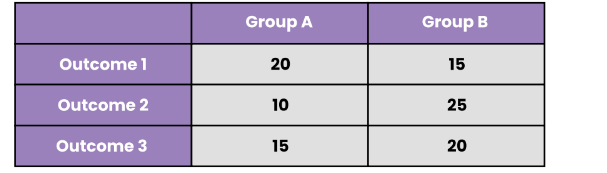

In [3]:
import numpy as np
import scipy.stats as stats
Null_hypothesis = "We start by defining our null hypothesis (H0) which states that there is no relation between the variables. "

# Given data in a contingency table
observed_data = np.array([[20, 15], [10, 25],[15,20]])  #2d array data

# Perform chi-square test for the given data
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)
#dof = (no of rows -1)*(no of col - 1)
# expected values = (sum of row * sum of col) / total sum

print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square test statistic: 5.833333333333334
P-value: 0.05411376622282158
Degrees of freedom: 2
Expected frequencies:
 [[15. 20.]
 [15. 20.]
 [15. 20.]]


<hr>Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

In [4]:
import scipy.stats as stats

def proportion_confidence_interval(sample_proportion, sample_size, confidence_level=0.95):
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_critical * (sample_proportion * (1 - sample_proportion) / sample_size)**0.5
    lower_bound = sample_proportion - margin_of_error
    upper_bound = sample_proportion + margin_of_error
    return lower_bound, upper_bound

# Given data
sample_proportion = 60 / 500  # Proportion of individuals who smoke in the sample
sample_size = 500

# Calculate 95% confidence interval
confidence_interval = proportion_confidence_interval(sample_proportion, sample_size)
lower_bound, upper_bound = confidence_interval

print("95% Confidence Interval for the true proportion of smokers:")
print(f"Lower bound: {lower_bound:.4f}")
print(f"Upper bound: {upper_bound:.4f}")


95% Confidence Interval for the true proportion of smokers:
Lower bound: 0.0915
Upper bound: 0.1485


<hr>Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

In [5]:
import scipy.stats as stats

def confidence_interval(sample_mean, population_stddev, sample_size, confidence_level=0.90):
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_critical * (population_stddev / (sample_size**0.5))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return lower_bound, upper_bound

# Given data
sample_mean = 75
population_stddev = 12
sample_size = 100 # assumed sample size
# Calculate 90% confidence interval
lower_bound_90, upper_bound_90 = confidence_interval(sample_mean, population_stddev, sample_size)


print("90% Confidence Interval:")
print(f"Lower bound: {lower_bound_90:.2f}")
print(f"Upper bound: {upper_bound_90:.2f}")


90% Confidence Interval:
Lower bound: 73.03
Upper bound: 76.97


<hr>Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.<br>

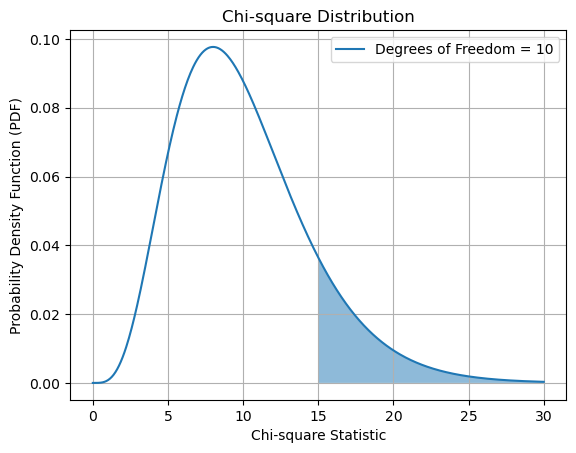

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

x  = np.linspace(0,30,500)
dof =10
pdf = stat.chi2.pdf(x,dof)
plt.plot(x,pdf, label = f"Degrees of Freedom = {dof}")

x_shade = np.linspace(15, 30, 100)
plt.fill_between(x_shade, stat.chi2.pdf(x_shade, dof), alpha=0.5)

plt.xlabel("Chi-square Statistic")
plt.ylabel("Probability Density Function (PDF)")
plt.legend()


plt.grid(True)
plt.title("Chi-square Distribution")
plt.show()

<hr>Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

In [7]:
sample_proportion = 520/1000
sample_size = 1000
alpha = 0.01
z_critical = stats.norm.ppf(1 - alpha/ 2)
moe = (sample_proportion * (1-sample_proportion)/sample_size)**0.5
lower_bound = sample_proportion - z_critical*moe
upper_bound = sample_proportion + z_critical*moe
print("99% Confidence Interval for the true proportion of smokers:")
print(f"Lower bound: {lower_bound:.4f}")
print(f"Upper bound: {upper_bound:.4f}")

99% Confidence Interval for the true proportion of smokers:
Lower bound: 0.4793
Upper bound: 0.5607


<hr>Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

In [8]:
null_hypo = "The observed distribution does not differs significantly from the expected distribution.mean coin is fare"
alt_hypo = "The observed distribution differs significantly from the expected distribution. Mean coin is baised"
observed_frequencies = [45,55]  # objerved freo of head and tails
expected_freq = [50,50]  # coin is fair
dof = 1
chi_test, p = stat.chisquare(f_obs=observed_frequencies,f_exp=expected_freq)
c = stat.chi2.ppf(1-0.05,1)
alpha = 0.05
print(c,p,chi_test)

if p<alpha:
    print("reject the null hypothesis means, The observed distribution differs significantly from the expected distribution.mean coin is not fare")
else:
    print("fail to reject the null hypo means, The observed distribution does not differs significantly from the expected distribution.mean coin is fare")

3.841458820694124 0.31731050786291115 1.0
fail to reject the null hypo means, The observed distribution does not differs significantly from the expected distribution.mean coin is fare


<hr>Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis. Use a significance level of 0.05.

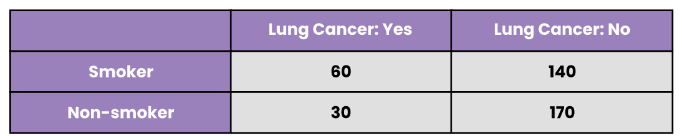

In [9]:
Null_hypothesis = "We start by defining our null hypothesis (H0) which states that there is no relation between the variables. "
alt_hypothesis = "It would state that there is a significant relationship between the two variables. "

obj_data = np.array([[60,140],[30,170]])

chi_t,p,df,expected = stat.chi2_contingency(obj_data)
print(p,df,expected)
if p < 0.05:
    print("Reject the Null hypothesis, It would state that there is a significant relationship between the two variables. ")
else:
    print("Fail to reject the null hypothesis")

0.0005158863863703744 1 [[ 45. 155.]
 [ 45. 155.]]
Reject the Null hypothesis, It would state that there is a significant relationship between the two variables. 


<hr>Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin. Use a significance level of 0.01.

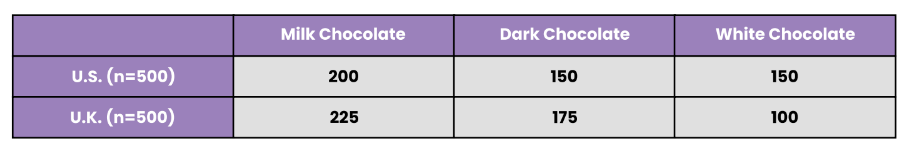

In [10]:
Null_hypothesis = "We start by defining our null hypothesis (H0) which states that there is no relation between the variables. "
alt_hypothesis = "It would state that there is a significant relationship between the two variables. "

obj_data = np.array([[200,150,150],[225,175,100]])

chi_t,p,df,expected = stat.chi2_contingency(obj_data)
print(p,df,expected)

if p < 0.01:
     print("Reject the Null hypothesis, It would state that there is a significant relationship between the two variables. ")
else:
    print("Fail to reject the null hypothesis")

0.0012348168997745918 2 [[212.5 162.5 125. ]
 [212.5 162.5 125. ]]
Reject the Null hypothesis, It would state that there is a significant relationship between the two variables. 


<hr>Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

In [11]:
h0 = "The population mean is not significantly different from the hypothesized mean (fail to reject the null hypothesis)."
h1 = "The population mean is significantly different from the hypothesized mean (fail to reject the null hypothesis)."
# we use one sample t-test

ss=30
sm=72
u = 70 # hypothesized mean
sstd = 10
alpha = 0.05

t = (sm-u)/(sstd/(ss**0.5))

ct = stat.t.ppf(1-alpha/2, ss-1)
print(t,ct)

if t<ct:
    print("We fail to reject the null hypothesis")

1.0954451150103321 2.045229642132703
We fail to reject the null hypothesis
